In [3]:
pip install opencv-python

  Using cached opencv_python-4.7.0.68-cp37-abi3-win_amd64.whl (38.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf

In [4]:
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings("ignore")

step one: <pre>lets pre proccess the image
I will use agumentation to multiply the number of elements </pre>

In [7]:
import albumentations as alb
import cv2
import os
import uuid
import numpy as np
from sklearn.utils import shuffle
from random import randint

In [61]:

transform = alb.Compose([
    alb.RandomCrop(width=150, height=150),
    alb.HorizontalFlip(p=0.5),
    alb.RandomGamma(p=0.2), 
    alb.RGBShift(p=0.2), 
    alb.VerticalFlip(p=0.5)]
)


<pre>
image_dir = 'train_data'

for image_class in os.listdir(image_dir):
    for image in os.listdir(os.path.join(image_dir, image_class)):
        image_path = os.path.join(image_dir, image_class, image)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = tf.image.resize(img, (150,150))
        img = np.array(img)
        try:
            for i in range(50):
                agumented = transform(image=img)
                cur_path = os.path.join(image_dir, image_class, f'{str(uuid.uuid1())}.jpg')
                cv2.imwrite(cur_path, agumented['image'])
                print("succes")
        except Exception as e:
            print(str(e))
            </pre>
        

In [82]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0
    
    for labels in os.listdir(directory): #Main Directory where each class label is present as folder name.
        if labels == 'five_birr': #Folder contain Glacier Images get the '2' class label.
            label = 0
        elif labels == 'ten_birr':
            label = 1
        elif labels == 'fifty_birr':
            label = 2
        elif labels == 'hundred_birr':
            label = 3
        elif labels == 'two_hundred_birr':
            label = 4
            
        image_folder = os.path.join(directory , labels)
        for image_file in os.listdir(image_folder): #Extracting the file name of the image from Class Label folder
            path = os.path.join(image_folder , image_file)
            image = cv2.imread(path) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
    
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

def get_classlabel(class_code):
    labels = {0:'five_birr', 1:'ten_birr', 2:'fifty_birr', 3:'hundred_birr', 4:'two_hundred_birr'}
    return labels[class_code]

step two: <pre>change the image to numpy array</pre>

In [83]:
Images, Labels = get_images(os.path.join('train_data')) #Extract the training images from the folders.
Images = np.array(Images)/255 #converting the list of images to numpy array and also normalize the the imafe
Labels = np.array(Labels)

In [84]:
import imghdr

In [85]:
img = os.path.join('train_data', 'five_birr', '68fa4378-8d8e-11ed-8914-4cd57764c5d2.jpg')
img = cv2.imread(img)
image_exts = ['jpeg', 'jpg', 'png', 'bmp']


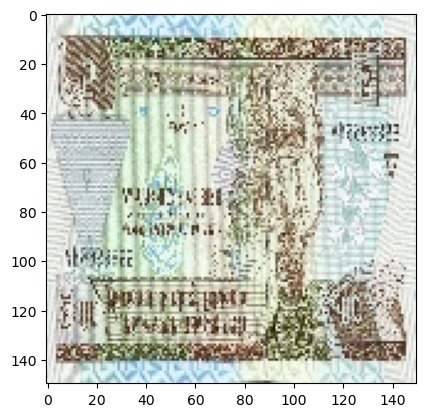

In [86]:
plot.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plot.show()

In [87]:
Images

array([[[[0.67058824, 0.69411765, 0.69019608],
         [0.61568627, 0.63921569, 0.63529412],
         [0.69411765, 0.70588235, 0.69803922],
         ...,
         [0.61568627, 0.63529412, 0.63137255],
         [0.69019608, 0.70588235, 0.70980392],
         [0.67058824, 0.68627451, 0.69019608]],

        [[0.71372549, 0.7372549 , 0.73333333],
         [0.60784314, 0.62745098, 0.62352941],
         [0.67843137, 0.69019608, 0.68235294],
         ...,
         [0.63921569, 0.65882353, 0.65490196],
         [0.70588235, 0.72156863, 0.7254902 ],
         [0.65882353, 0.6745098 , 0.67843137]],

        [[0.68235294, 0.69803922, 0.70196078],
         [0.62745098, 0.64705882, 0.64313725],
         [0.73333333, 0.74509804, 0.7372549 ],
         ...,
         [0.67058824, 0.68235294, 0.6745098 ],
         [0.68235294, 0.69019608, 0.69019608],
         [0.58823529, 0.59607843, 0.59607843]],

        ...,

        [[0.63529412, 0.63921569, 0.63137255],
         [0.7254902 , 0.72941176, 0.72156863]

In [88]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (585, 150, 150, 3)
Shape of Labels: (585,)


In [89]:
from matplotlib import pyplot as plt

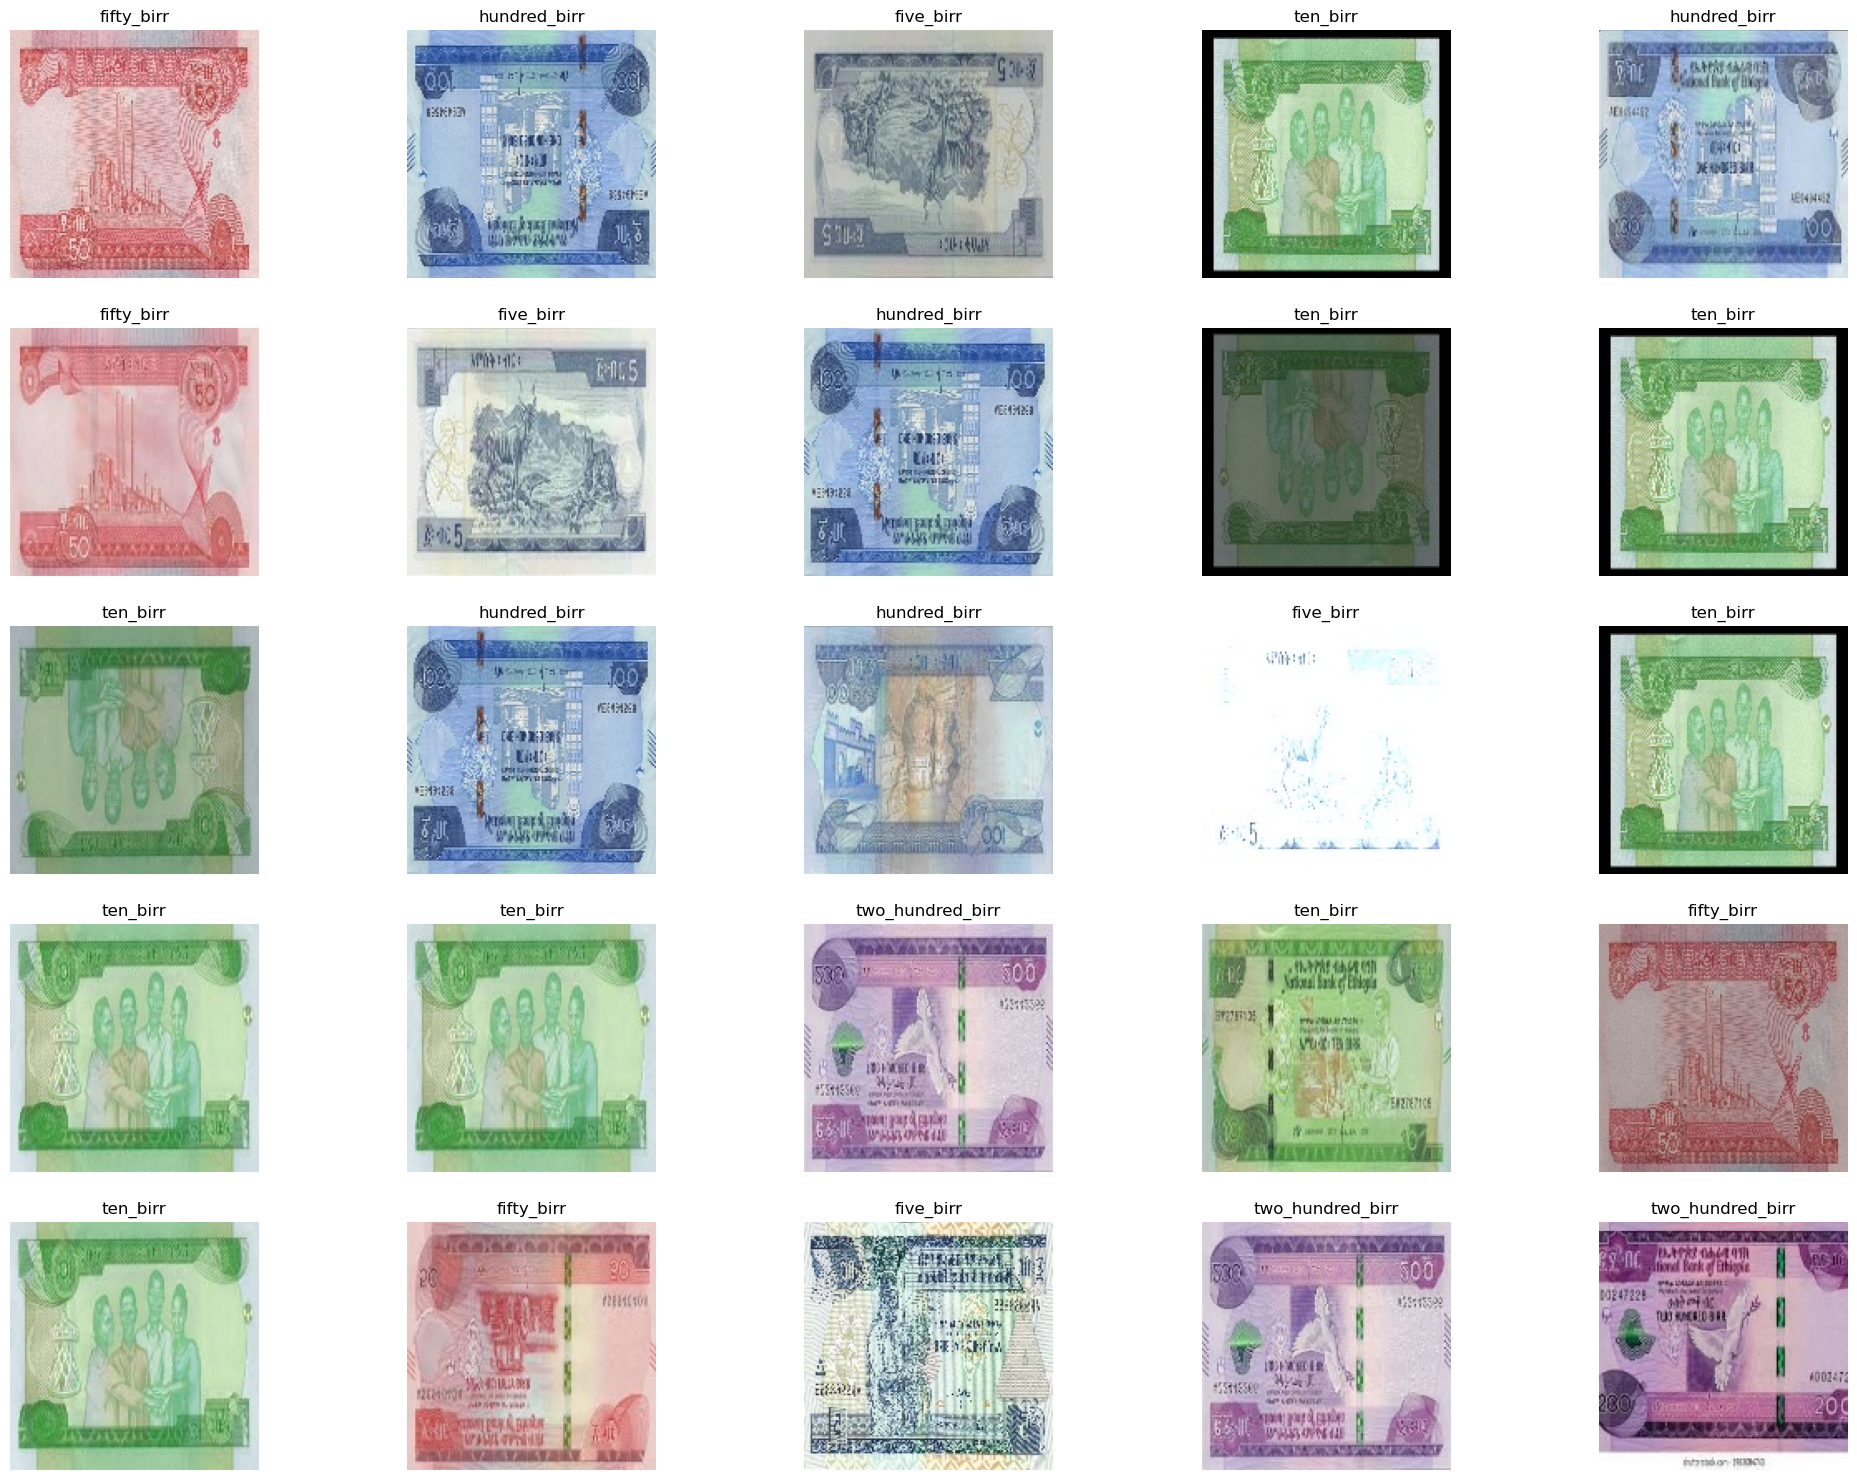

In [136]:
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_classlabel(Labels[rnd_number]))
        ax[i,j].axis('off')

In [92]:
model = Models.Sequential()

model.add(Layers.Conv2D(150,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(125,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))

model.add(Layers.Conv2D(125,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(25,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(2,2))

model.add(Layers.Flatten())
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dense(25,activation='relu'))

model.add(Layers.Dropout(rate=0.2))
model.add(Layers.Dense(5,activation='softmax'))

model.compile(optimizer=Optimizer.Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 148, 148, 150)     4200      
                                                                 
 conv2d_7 (Conv2D)           (None, 146, 146, 125)     168875    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 125)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 71, 71, 125)       140750    
                                                                 
 conv2d_9 (Conv2D)           (None, 69, 69, 100)       112600    
                                                                 
 conv2d_10 (Conv2D)          (None, 67, 67, 50)        45050     
                                                      

In [93]:
trained = model.fit(Images,Labels,epochs=8,validation_split=0.2)

Epoch 1/8
15/15 [==============================] - 180s 12s/step - loss: 1.6679 - accuracy: 0.2222 - val_loss: 1.6191 - val_accuracy: 0.1709
Epoch 2/8
15/15 [==============================] - 170s 11s/step - loss: 1.5454 - accuracy: 0.2821 - val_loss: 1.3161 - val_accuracy: 0.3932
Epoch 3/8
15/15 [==============================] - 171s 11s/step - loss: 1.2698 - accuracy: 0.4038 - val_loss: 0.9286 - val_accuracy: 0.5983
Epoch 4/8
15/15 [==============================] - 173s 12s/step - loss: 0.8386 - accuracy: 0.6603 - val_loss: 0.8106 - val_accuracy: 0.6838
Epoch 5/8
15/15 [==============================] - 176s 12s/step - loss: 0.6232 - accuracy: 0.8077 - val_loss: 0.3685 - val_accuracy: 0.8376
Epoch 6/8
15/15 [==============================] - 175s 12s/step - loss: 0.4079 - accuracy: 0.8675 - val_loss: 0.1389 - val_accuracy: 0.9658
Epoch 7/8
15/15 [==============================] - 170s 11s/step - loss: 0.1493 - accuracy: 0.9594 - val_loss: 0.1717 - val_accuracy: 0.9573
Epoch 8/8
15/

In [126]:
trained.history

{'loss': [1.6678975820541382,
  1.5453746318817139,
  1.2697813510894775,
  0.8386029601097107,
  0.6231711506843567,
  0.4078778624534607,
  0.14934700727462769,
  0.20086489617824554],
 'accuracy': [0.2222222238779068,
  0.28205129504203796,
  0.4038461446762085,
  0.6602563858032227,
  0.807692289352417,
  0.867521345615387,
  0.9594017267227173,
  0.9551281929016113],
 'val_loss': [1.619096279144287,
  1.3161120414733887,
  0.9286235570907593,
  0.8106163740158081,
  0.36845266819000244,
  0.1388733685016632,
  0.1717122197151184,
  0.1262626200914383],
 'val_accuracy': [0.17094017565250397,
  0.39316239953041077,
  0.5982906222343445,
  0.6837607026100159,
  0.8376068472862244,
  0.9658119678497314,
  0.9572649598121643,
  0.9658119678497314]}

In [95]:
import tensorflow as tf

In [143]:
model.save('birr_recognize.h5')

In [ ]:
from tensorflow.keras.models import loadmodel

In [127]:
history = trained.history

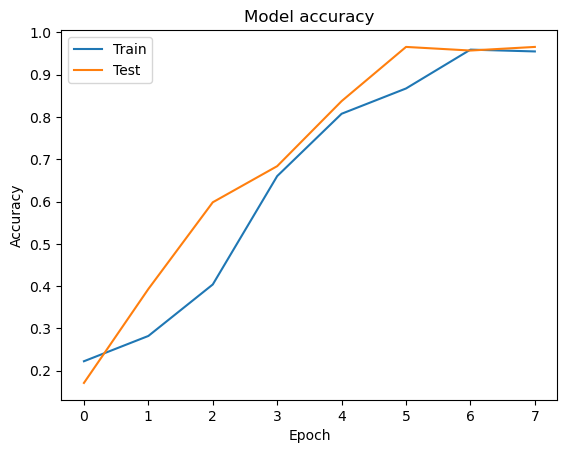

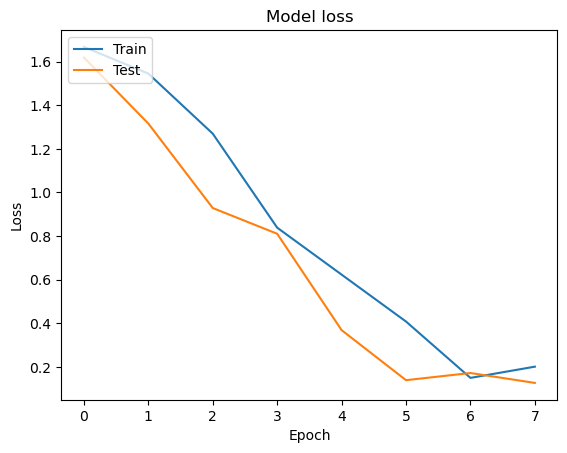

In [128]:
plot.plot(history['accuracy'])
plot.plot(history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()


plot.plot(history['loss'])

plot.plot(history['val_loss'])

plot.title('Model loss')

plot.ylabel('Loss')

plot.xlabel('Epoch')

plot.legend(['Train', 'Test'], loc='upper left')

plot.show()

In [141]:
img = cv2.imread('ten.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resized = cv2.resize(img,(150,150))
pred_prob = model.predict(np.expand_dims(resized/255,0)).reshape(5)
pred_image = np.array([resized])
idx = np.argmax(pred_prob,axis=0)

pred_class = get_classlabel(idx)
print(pred_prob[idx] / sum(pred_prob) * 100)
print(pred_class)

1/1 [==============================] - 0s 192ms/step
93.50257097832746
ten_birr


In [142]:
import time

In [148]:
test_images, test_Labels = get_images(os.path.join('train_data')) #Extract the training images from the folders.
test_images = np.array(test_images)/255 #converting the list of images to numpy array and also normalize the the imafe
test_Labels = np.array(test_Labels)

In [149]:
model.evaluate(test_images,test_Labels, verbose=1)

19/19 [==============================] - 57s 3s/step - loss: 0.1088 - accuracy: 0.9778


[0.1087690144777298, 0.9777777791023254]

In [150]:
pred_images = test_images

1/1 [==============================] - 0s 192ms/step


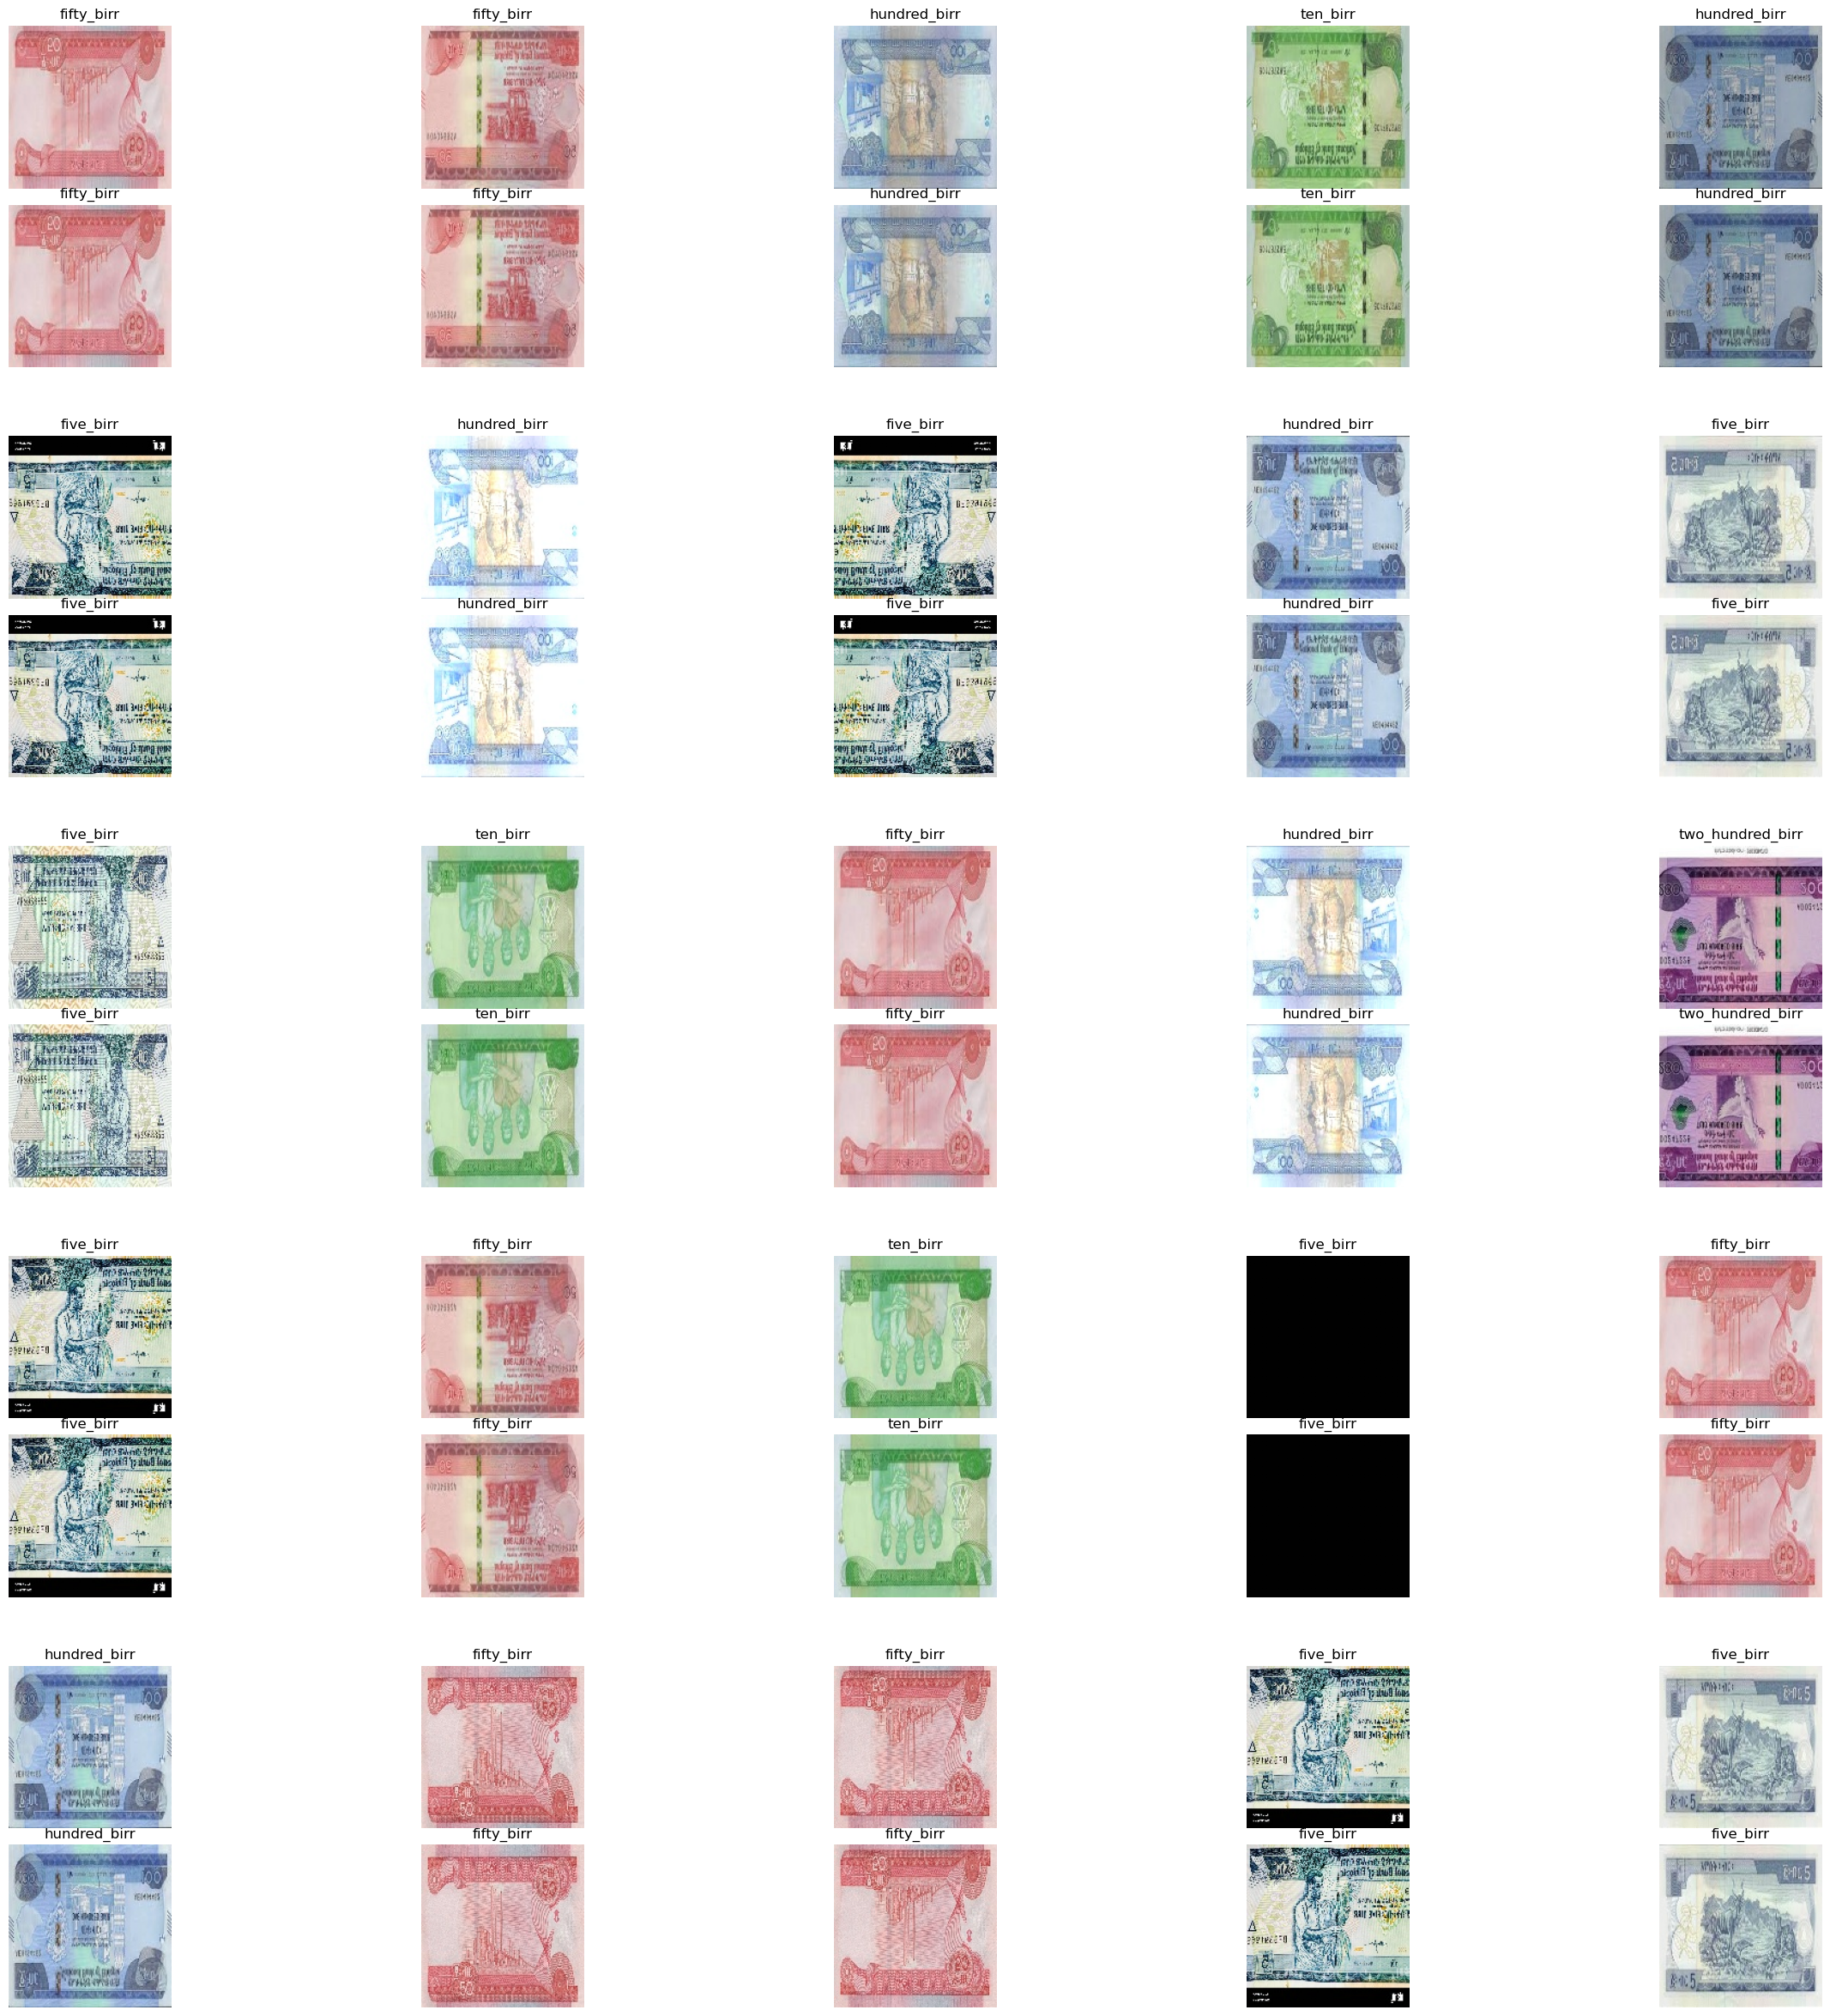

In [154]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_prob = model.predict(pred_image).reshape(5)
    pred_class = get_classlabel(np.argmax(pred_prob,axis=0))
    for j in range(2):
        ax = plot.Subplot(fig, inner[j])
        ax.imshow(pred_image[0])
        ax.set_title(pred_class)
        fig.add_subplot(ax)
        ax.axis('off')
fig.show()

In [130]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    resized = cv2.resize(frame,(150,150))
    pred_prob = model.predict(np.expand_dims(resized/255,0)).reshape(3)
    pred_image = np.array([resized])
    idx = np.argmax(pred_prob,axis=0)
    pred_class = get_classlabel(idx)
    
    cv2.rectangle(frame, 
                      tuple(np.multiply([0.2, 0.2], [0.7,.7]).astype(int)),
                      tuple(np.multiply([0, 0], [450,450]).astype(int)), 
                            (255,0,0), 2)
    
    if pred_prob[idx] / sum(pred_prob) < .8:
        pred_class = 'Identifing ....... '
    
    cv2.putText(frame, pred_class, (200, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255))
    
    cv2.imshow('Detect', frame)
    time.sleep(2)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


In [31]:
def pridict(image):    
    yhat = model.predict(np.expand_dims(image/255, 0))
    idx = 0
    cur = 0
    tot = 0
    for ci, i in enumerate(yhat[0]):
        if i > cur:
            idx = ci
            cur = i
        tot += i
    return get_classlabel(idx), cur/tot * 100, yhat